## PATTERN MINING IN PYTHON
#### École d'ingénieurs Léonard de Vinci, La Défense, Paris
**Hugo Alatrista Salas** 

**Note:** This is a graded job (11 points).
***

One stage of the KDD process is called Data Mining, which aims to extract patterns from a dataset. In recent years, the term Data Mining has been associated with different methods, such as supervised (classification) and unsupervised (segmentation) learning methods, descriptive statistical analysis, among others. However, as U. Fayyad mentions, data mining techniques are associated with pattern extraction - frequent correlations - that appear within a dataset (Pattern Mining).

The analogy between mining activity and data mining is perfect at this point. The mining activity aims to extract small gold nuggets from large quantities of sand and mud. Similarly, in data mining, the goal is to find patterns within a vast amount of data. These patterns should represent correlations between the characteristics of the objects described by the data.

In addition, these correlations should represent usual or frequent behaviors. In this context, frequency in these types of tasks is important. A pattern is a structure that repeats or appears frequently in a set of data.

In this type of task, the notion of frequency is linked to the choice of a threshold (usually denoted by $\sigma$), which allows us, in a certain way, to filter the frequency of the casual. This $\sigma$ value is a parameter the user uses to show only frequent itemsets or "patterns".



## Extraction of frequent itemsets in Python

As we have seen in the main course, an itemset is a set of items (products) that appear in the same transaction (purchase). So, a frequent itemset is a set of products frequently appearing in a transaction database. For example, thanks to this kind of patterns, we can find that, when someone buys fish and lemon, usually buys sweet potato, too.

The problem in extracting frequent itemsets is summarized as follows: given a transaction database (purchases) and a $\sigma$ threshold, extract all itemsets that appear in at least $\sigma$ transactions from the transaction database. One of the first algorithms for extracting frequent itemsets is *a-priori* (see slides of the main course). This algorithm exploits the anti-monotony property to reduce the search space and efficiently achieve frequent itemset extraction.

Python offers a library for extracting frequent itemsets. The library we will use is called *pymining*, which was proposed by Christian Borgelt and is available under the new BSD license (see https://github.com/bartdag/pymining). This library can be installed using *pip install pymining*. To extract frequent itemsets, we first import the library using the following line of code.

In [246]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

Once the library is imported, we generate the transaction database. To exemplify the itemset mining task, will use a database that the authors of the library use on their website. This dataset (matrix) contains the purchases of 5 individuals. So, each row represents an *Itemset* or set of purchases per customer. To create the transactions, we use the square brackets as transaction separators, and each item must be represented by a data type *string*. That is, it must be within single quotes.

In [247]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

Next, we need to transform this array into a structure the algorithm can understand. To this aim, we use the *TransactionEncoder* function from the *mlxtend* library. In addition, this new data organization will be saved in a Pandas dataframe.

In [248]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Yogurt
0,False,False,False,True,False,True,True,True,True,True
1,False,False,True,True,False,True,False,True,True,True
2,True,False,False,True,False,True,True,False,False,False
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,True,True,False,False,True,False


As you can see, the new structure has a list of products in the columns section, and each (binary) data represents the product's purchase (or not). It is time to extract patterns or frequent itemsets from the dataframe. Remember that we must use the parameter *minimal support*, which works as a threshold to determine whether a candidate is or is not a pattern (frequent *itemset*)

In [249]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(9)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(9, 5)"


We can show the name of products using the parameter *use_colnames=True*

In [250]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In the line above, we use three parameters out of the many that the *apriori* function has. First, we need to include the structure that stores the data (in our case, the *dataframe*). In addition, we fix the minimum support as a percentage (60%). Finally, the *use_colnames=True* option displays the results using the column names, not their index (1 = Apple because the items are alphabetically ordered). You can test how the results come out by removing this last option.

## Working with real data

In this second part, we will use another data with a more significant number of data (4627 rows × 216 columns). This data belongs to a dataset provided by the WEKA tool (originally in ARFF format) and contains purchases of products in different departments (*items*). So, we can start by importing the CSV file into a *dataframe*.

In [251]:
superdf = pd.read_csv('superBIS.csv')

In [252]:
superdf

,department1,department2,department3,department4,department5,department6,department7,department8,department9,'grocery misc',...,department207,department208,department209,department210,department211,department212,department213,department214,department215,department216
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4623,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4624,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we can see, our dataset has the shape that the mlxtend tool requires as input. So, it is no longer necessary to pre-process the data. So, we can directly use the **mlxtend** library to extract the patterns. Do not forget that it is mandatory to fix the minimal support, which works as a filter or threshold.

In [253]:
patts = apriori(superdf, min_support=0.43, use_colnames=True)

In the previous line, we do not display the patterns stored in a new variable called *patts*. This variable can be listed, or we can even display the number of elements in the pattern list.

In [254]:
len(patts)

21

In [255]:
patts

,support,itemsets
0,0.719689,('bread and cake')
1,0.604063,('baking needs')
2,0.532310,(juice-sat-cord-ms)
3,0.563000,(biscuits)
4,0.475686,(sauces-gravy-pkle)
5,0.587206,('frozen foods')
6,0.503566,('party snack foods')
7,0.485628,('tissues-paper prd')
8,0.635185,(milk-cream)
9,0.494489,(margarine)


## Impact of minimal support on pattern extraction

As we saw in the main course, minimal support $\sigma$ is used as a threshold to extract only those *itemsets* that are frequent. That is, if the support of a candidate is greater than the minimal support, then the candidate becomes a pattern, which is shown in the results list. If the minimal support is close to 1 (100%), we will obtain very specific patterns. That is, they appear in all data set records (almost all customers bought that *item). On the contrary, if the minimal support is low (close to zero), the patterns are very general, i.e., we extract patterns that many people do not necessarily buy. In this part, we want to analyze the effect of the minimal support on the number of patterns obtained. To this aim, we must run the *apriori* algorithm many times with different supports (0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25... until the calculation time allows it). Then, for each experiment, we save the number of patterns extracted (for example, for $\sigma = 0.7$, we have only one pattern).

### Exercise 1 (3 points)

Implement the idea above described and visualize it. What can we observe from the image? Explain the phenomenon in a few lines.

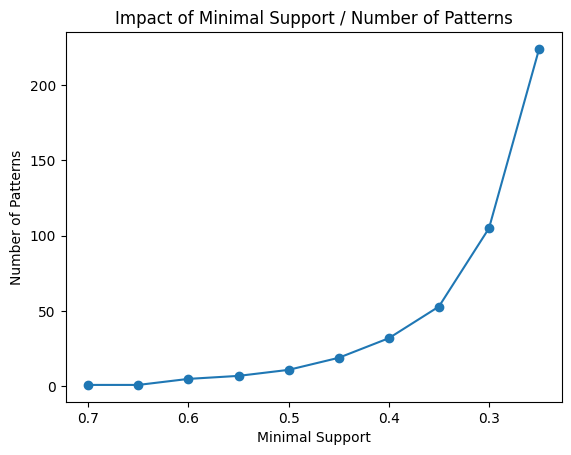

In [256]:
# Here your code
import matplotlib.pyplot as plt

supports = [0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25]
num_patterns = []

for support in supports:
    patterns = apriori(superdf, min_support=support, use_colnames=True)
    num_patterns.append(len(patterns))

plt.plot(supports, num_patterns, marker='o')
plt.xlabel('Minimal Support')
plt.ylabel('Number of Patterns')
plt.title('Impact of Minimal Support / Number of Patterns')
plt.gca().invert_xaxis()
plt.show()

## Association rules: extending the notion of itemset mining

In itemset mining, we start by identifying groups of items, or itemsets, that frequently occur together in a dataset. However, while frequent itemsets tell us which items commonly appear together, they don’t reveal specific patterns or directions in relationships between these items. Indeed, the itemset mining can be extended to find another pattern, including the if-then relationships between items to provide more actionable insights. An **association rule** is essentially a conditional probability rule that takes the form $A \rightarrow B$, where $A$ (the antecedent) and $B$ (the consequent) are sets of items (or itemsets). Here, A is an itemset that, if present in a transaction, increases the likelihood that B (another itemset) will also be in that transaction.

Building association rules from frequent itemsets requires generating every possible combination of items within a frequent itemset to form potential $A \rightarrow B$ pairs. For example, if *{bread, butter, milk}* is a frequent itemset, we might extract three rules: 

- *bread $\rightarrow$ butter, milk*
- *butter $\rightarrow$ bread, milk*
- *milk $\rightarrow$ bread, butter*
- *bread, butter $\rightarrow $ milk*
- *bread, milk $\rightarrow $ butter*
- *milk, butter $\rightarrow $ bread*

After generating these rules, we evaluate them based on metrics to ensure they are meaningful and reliable.

The **confidence** metric is one of the primary measures for assessing association rules. Confidence represents the probability that the consequent $B$ occurs when the antecedent $A$ is present. Mathematically, it is calculated as the ratio of transactions containing both $A$ and $B$ to the total number of transactions containing $A$ alone. For instance, if $A$ = {bread} and $B$ = {butter}, confidence tells us how likely the butter will be purchased when bread is bought. Higher confidence indicates a stronger predictive power for the rule, suggesting a more consistent pattern. The term **predictive** can be interpreted differently from those used in machine learning. 

Another helpful metric is **lift**, which evaluates the strength of the association beyond random chance. Lift is calculated by dividing the rule's confidence by the expected frequency of the consequent, assuming it occurs independently of the antecedent. A lift value greater than 1 suggests that A and B have a positive association beyond random chance, meaning they are more likely to appear together than independently. Conversely, a lift below 1 implies a negative association and a lift close to 1 indicates no significant association. 
Of course, we also have the support as a metric for indicating how frequent an association rule is (in terms of the antecedent, consequent, and itemset supports). We also have other metrics like leverage or conviction that have their interpretation. All these metrics can be used/combined to evaluate and rank the patterns extracted.

Fortunately, the mlxtend has a tool for extracting association rules from itemsets. As our first example, let us use the dataframe containing a few numbers of transactions. Due to the association rules mining being an extension of the itemset mining task, we first need to extract itemsets. Later, our tool will extract association rules from these itemsets. The following lines of code do that.

In [257]:
from mlxtend.frequent_patterns import association_rules
patterns = apriori(df, min_support=0.6, use_colnames=True)
ar = association_rules(patterns, metric="lift", min_threshold=1, num_itemsets=len(patterns))

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning:

invalid value encountered in divide



Remember that all association rules were built from frequent patterns (those appearing at least in 60% of our dataset). When we extract association rules, it is possible to use a second minimal support, but now this threshold is associated with another metric (in our example, lift). Then, all association rules with a lift measure of at least one are shown. Remember that lift has values between 0 and infinity.

In [258]:
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,1.0,0.00,1.0,0.0,0.80,0.000,0.900
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,1.0,0.00,inf,0.0,0.80,0.000,0.900
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,1.0,0.12,1.6,1.0,0.75,0.375,0.875
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,1.0,0.12,inf,0.5,0.75,1.000,0.875
4,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,1.0,0.00,1.0,0.0,0.60,0.000,0.800
5,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,1.0,0.00,1.0,0.0,0.60,0.000,0.800
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800
8,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,1.0,0.00,1.0,0.0,0.60,0.000,0.800
9,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,1.0,0.00,inf,0.0,0.60,0.000,0.800


As the results (association rules) are stored in a well-known data frame, we can query it to search for specific information. For example, we can show the antecedents of association rules or the association rules having support greater than 0.6.

In [259]:
ar.antecedents

0            (Kidney Beans)
1                    (Eggs)
2                    (Eggs)
3                   (Onion)
4            (Kidney Beans)
5                    (Milk)
6            (Kidney Beans)
7                   (Onion)
8            (Kidney Beans)
9                  (Yogurt)
10     (Kidney Beans, Eggs)
11    (Kidney Beans, Onion)
12            (Eggs, Onion)
13           (Kidney Beans)
14                   (Eggs)
15                  (Onion)
Name: antecedents, dtype: object

In [260]:
ar.loc[ar.support > 0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,1.0,0.0,1.0,0.0,0.8,0.0,0.9
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.0,1.0,0.0,inf,0.0,0.8,0.0,0.9


## Visualization of association rules

A Sankey diagram is a flow-based visualization representing the movement or relationship between different elements. In a Sankey diagram, nodes represent individual elements (such as items or categories), and the links (or flows) between nodes represent the volume or frequency of movement from one node to another. The width of each link is proportional to the magnitude of the flow it represents, allowing viewers to grasp which paths are more significant quickly. Sankey diagrams help understand relationships, especially where multiple paths and connections intersect, as they reveal major and minor flows visually intuitively.

When applied to association rules, Sankey diagrams can represent the relationships between antecedent and consequent items in a visual format. In this context, nodes represent items or itemsets in the rules, while links represent the association from antecedent to consequent. The width of each link can be scaled based on metrics like support or confidence. For example, suppose we have association rules derived from market basket analysis, such as ${bread}\rightarrow {butter}$ or ${milk, eggs} \rightarrow {bread}$. We can set up a Sankey diagram where items like "bread," "butter," "milk," and "eggs" serve as nodes. Links connect the antecedent nodes to the consequent nodes, with the link widths representing the strength of the association (e.g., confidence).

The first step for visualizing the Sankey diagram is to build a list of all items to visualize as nodes. From this list of nodes, we must select which nodes belong to the antecedents and the consequents. 

### Exercise 2 (3 points)

Create a list containing all distinct nodes (items or itemsets) called **allnodes** and two other lists, one for indices of nodes appearing in the antecedents (called **source_indices**) and the other for storing the index of nodes appearing in the consequent (called **target_indices**). Also, create a list containing the confidence (called **conf_values**). Remember that we are working with the **ar** dataframe, which includes 16 association rules. Thus, the three lists, namely **source_indices**, **target_indices**, **conf_values** have the same size equal to 16 because we have 16 association rules to visualize. Note that the size of **allnodes** is equal to 6.

In [261]:
# Here your code
allnodes = list(set(item for sublist in ar['antecedents'].tolist() + ar['consequents'].tolist() for item in sublist))

source_indices = [allnodes.index(list(ant)[0]) for ant in ar['antecedents']]
target_indices = [allnodes.index(list(con)[0]) for con in ar['consequents']]
conf_values = ar['confidence'].tolist()

Finally, considering the three lists created above, we will visualize the Sankey diagram using Plotly in their Graph Objects version. To make a Sankey diagram for visualizing association rules, you must specify key parameters to define the nodes, links, and their attributes. In this example, we will use the following.

Concerning the nodes, we need: 1) Label: An array of labels for each node. In the context of association rules, each unique item (or itemset) from the antecedents and consequents is a node, so this array should contain all unique items involved in the rules (we have eight). 2) Color (optional): An array defining the color for each node to distinguish between different items visually.

Concerning the links, we must define the following: 1) Source: An array representing the starting node of each link (index of the antecedent node). This list uses the index of each node from the label parameter. 2) Target: An array representing the ending node of each link (index of the consequent node). This is also based on the index of each node in the label. 3) Value: A list defining the width of each link, which can be scaled by support, confidence, or lift. Higher values produce wider links in the diagram, indicating stronger associations.

The following code does that.

In [262]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      #pad = 15,
      label = [0,1,2,3,4,5,6,7], # Here we use the index of different items or itemsets
      color = "red" # the color of nodes
    ),
    link = dict(
      source = source_indices, # our list of indices of antecedent set
      target = target_indices, # our list of indices of consequent set
      value = conf_values # our list of confidence for each rule (16)
  ))])

fig.show()

### Exercise 3 (1 point)

Improve the previous figure to assign the product name (e.g., milk) instead of their index.

In [263]:
# Here tour code
fig = go.Figure(data=[go.Sankey(
    node = dict(
      label = allnodes,  # Use product names instead of indices
      color = "red"
    ),
    link = dict(
      source = source_indices,
      target = target_indices,
      value = conf_values
  ))])

fig.show()

### Exercise 4 (4 points)

On the Internet, there are many sets of transaction data. An example is the one available in url- http://fimi.uantwerpen.be/data/retail.dat, which stores 88162 transactions or purchases of products which are represented by their ID (integers). In this part of the practical work, we will use Pandas to open this file remotely using the following code:

In [264]:
import pandas as pd
import requests

# Fetch the data from the URL
url = "http://fimi.uantwerpen.be/data/retail.dat"
response = requests.get(url)
if response.status_code == 200:
    transactions = [line.strip().split() for line in response.text.split('\n') if line.strip()]
else:
    raise Exception(f"Failed to fetch data from {url}. HTTP Status: {response.status_code}")


In this exercise, you will use the dataset recovered from the Internet (data) and extract the frequent itemsets as you did in this lab. You will also answer the following questions:

1. For which minimal support do we get at least one frequent item set?
2. How many frequent itemsets do we extract for a minimal support of 0.1
3. What conclusion can we draw from the above result? 

In [265]:
# Here your code
# Convert to a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori to find frequent patterns
patterns = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(patterns, metric="lift", min_threshold=1, num_itemsets=len(patterns))

print(patterns.head())
print(rules.head())

    support itemsets
0  0.012500   (1004)
1  0.025374    (101)
2  0.010004  (10515)
3  0.031692    (110)
4  0.016175   (1146)
  antecedents consequents  antecedent support  consequent support   support  \
0        (39)       (101)            0.574794            0.025374  0.015880   
1       (101)        (39)            0.025374            0.574794  0.015880   
2        (48)       (101)            0.477927            0.025374  0.014870   
3       (101)        (48)            0.025374            0.477927  0.014870   
4        (38)       (110)            0.176902            0.031692  0.030909   

   confidence      lift  representativity  leverage  conviction  \
0    0.027627  1.088804               1.0  0.001295    1.002317   
1    0.625838  1.088804               1.0  0.001295    1.136422   
2    0.031114  1.226239               1.0  0.002744    1.005925   
3    0.586053  1.226239               1.0  0.002744    1.261207   
4    0.174724  5.513258               1.0  0.025303    1.173315 

In [266]:
# To answer question 2
patterns_0_1 = apriori(df, min_support=0.1, use_colnames=True)
print(len(patterns_0_1))

9


### <span style="color:cyan;"><i>Your answer Here</i></span>

1. **For which minimal support do we get at least one frequent itemset?**
   - Based on the provided results, frequent itemsets are extracted when the minimal support is set to `0.01`. At this threshold, the algorithm finds at least one frequent itemset.

2. **How many frequent itemsets do we extract for a minimal support of 0.1?**
   - When the minimal support is set to `0.1`, the algorithm extracts **9 frequent itemsets**.

3. **What conclusion can we draw from the above result?**
   - As the minimal support decreases, the number of frequent itemsets increases. This is expected because a lower support threshold allows more itemsets to qualify as "frequent." However, very low support values might result in too many itemsets, some of which may lack practical significance. A balance between support threshold and the desired level of detail is necessary for meaningful results.
